# Veryifying WheatFspm impulse experiments

The goal of this notebook is to verify that the experiment ran succesfully and that the reservoir experienced the impulse and changed trajectory.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '../../'))  # for importing local packages from src

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{gensymb} \usepackage{siunitx}'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 12

### Loading the dataset

In [2]:
DATASET_PATH = '../datasets/dataset_NEMA3_impulse.csv'

In [3]:
from rc_dataset_impulse_cnwheat import ExperimentDataset

dataset = ExperimentDataset(csv_path=DATASET_PATH)

## Verifying experiment inputs

In [4]:
run_ids = dataset.get_run_ids()
run_params = [run_id.split('__') for run_id in run_ids]
run_params = [(date, int(width[-1]), int(value))for (_, date, width, value) in run_params]


def get_run_id(date, width, value):
  return f'{date}__{width}__{value}'

run_ids

array(['NEMA_H3__day0__width0__0', 'NEMA_H3__day18__width1__0',
       'NEMA_H3__day18__width1__4000', 'NEMA_H3__day18__width2__0',
       'NEMA_H3__day18__width2__4000', 'NEMA_H3__day18__width3__0',
       'NEMA_H3__day18__width3__4000', 'NEMA_H3__day18__width4__0',
       'NEMA_H3__day18__width4__4000', 'NEMA_H3__day18__width5__0',
       'NEMA_H3__day18__width5__4000', 'NEMA_H3__day27__width1__0',
       'NEMA_H3__day27__width1__4000', 'NEMA_H3__day27__width2__0',
       'NEMA_H3__day27__width2__4000', 'NEMA_H3__day27__width3__0',
       'NEMA_H3__day27__width3__4000', 'NEMA_H3__day27__width4__0',
       'NEMA_H3__day27__width4__4000', 'NEMA_H3__day27__width5__0',
       'NEMA_H3__day27__width5__4000', 'NEMA_H3__day9__width1__0',
       'NEMA_H3__day9__width1__4000', 'NEMA_H3__day9__width2__0',
       'NEMA_H3__day9__width2__4000', 'NEMA_H3__day9__width3__0',
       'NEMA_H3__day9__width3__4000', 'NEMA_H3__day9__width4__0',
       'NEMA_H3__day9__width4__4000', 'NEMA_H3__day9__width

C:\Users\Max\AppData\Local\Temp/ipykernel_2120/1068305484.py:32: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


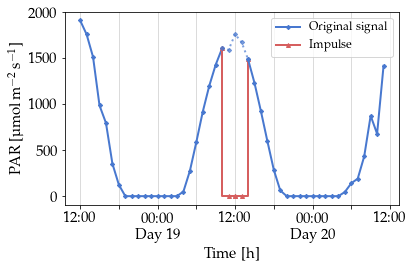

In [47]:
INPUT = 'input_PARi'
BASELINE = 'NEMA_H3__day0__width0__0'
EXPERIMENT = 'NEMA_H3__day18__width3__0'

START = 18 * 24 - 12
END = 19 * 24 + 12


baseline_in = dataset.get_target(INPUT, BASELINE)[START:END]
experiment_in = dataset.get_target(INPUT, EXPERIMENT)[START:END]


with plt.style.context('seaborn-muted'):
  fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
  colors = sns.color_palette()

  ax.plot(experiment_in.loc[:442], c=colors[0], linewidth=2,  label="Original signal", marker="D", markersize=3)
  ax.plot([442, 443, 444], experiment_in.loc[442:444], color=colors[2], linewidth=2, linestyle='solid', drawstyle='steps-pre', label="Impulse",  marker="^", markersize=4)
  ax.plot([444, 445, 446], experiment_in.loc[444:446], color=colors[2], linewidth=2, linestyle='solid', drawstyle='steps-post',  marker="^", markersize=4)
  ax.plot(baseline_in.loc[442:446], c=colors[0], linewidth=2, alpha=0.7, linestyle='dotted',  marker="D", markersize=3)
  ax.plot(experiment_in.loc[446:], c=colors[0], linewidth=2,  marker="D", markersize=3)

  xticks = np.arange(START, START + len(baseline_in) + 1, 6)
  ax.set_xticks(xticks)
  xticklabels = [f'00:00\nDay {x // 24 + 1}' if not x % 24 else '12:00' if not x % 12 else '' for x in xticks]
  ax.set_xticklabels(xticklabels)
  ax.grid(axis='x', linestyle='solid', color='lightgrey')
  ax.set_xlabel(r'Time [\unit{\hour}]')

  ax.set_ylabel(r'PAR [$\unit{\micro\mole\per\meter\squared\per\second}$]')
  ax.legend(loc='upper right')
  plt.tight_layout()
  plt.savefig('cn_impulse.png', dpi=200, facecolor='white')